In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/Shareddrives/KOPIS/

/content/drive/Shareddrives/KOPIS


## 모듈 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

SS = StandardScaler()
MM = MinMaxScaler()
pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b710a5090>,
                 k=None, metric=None, model=None, timings=True)

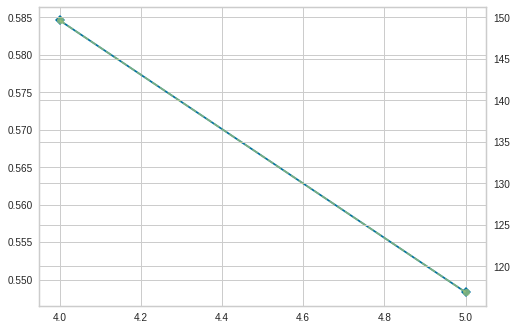

In [ ]:
model = SpectralClustering(affinity = "nearest_neighbors")
visualizer = KElbowVisualizer(model, k = (4, 6), metric = 'silhouette', timings = True)
visualizer.fit(clust_data)

In [ ]:
clust_data

,유료관객비율,좌석점유율,취소비율,시간차평균
0,1.0,0.000000,1.000000,0.277965
1,1.0,0.006667,0.982301,0.049748
2,1.0,0.013333,0.954545,0.106126
3,1.0,0.043333,0.814286,1.117410
4,1.0,0.013333,0.973510,0.267280
...,...,...,...,...
40851,1.0,0.315000,0.544578,13.453913
40852,1.0,0.276667,0.220657,4.971135
40853,1.0,0.345000,0.518605,8.429455
40854,1.0,0.230000,0.183432,2.873890


## 데이터 불러오기

In [ ]:
data = pd.read_csv("Dataset/rda files/clustering_genre.csv")

In [ ]:
data.head()

,장르명,공연코드,공연일시,유료관객비율,좌석점유율,취소비율,시간차평균
0,국악,PF351178,2020-01-01T17:00:00Z,1.0,0.000000,1.000000,0.277965
1,국악,PF351178,2020-01-02T17:00:00Z,1.0,0.006667,0.982301,0.049748
2,국악,PF351178,2020-01-03T17:00:00Z,1.0,0.013333,0.954545,0.106126
3,국악,PF351178,2020-01-04T14:00:00Z,1.0,0.043333,0.814286,1.117410
4,국악,PF351178,2020-01-04T17:00:00Z,1.0,0.013333,0.973510,0.267280


In [ ]:
clust_data = data.drop(["장르명", "공연코드", "공연일시"], axis = 1)

In [ ]:
# 상관관계는 그리 크지 않음
clust_data.corr()

,유료관객비율,좌석점유율,취소비율,시간차평균
유료관객비율,1.000000,-0.110440,0.055517,0.043903
좌석점유율,-0.110440,1.000000,-0.201581,0.142219
취소비율,0.055517,-0.201581,1.000000,0.339173
시간차평균,0.043903,0.142219,0.339173,1.000000


## 클러스터링 모델 임포트

In [ ]:
SC4 = SpectralClustering(n_clusters = 4, affinity = "nearest_neighbors")

In [ ]:
SC4_fit = SC4.fit(clust_data)

In [ ]:
# 아래가 결과인데 클러스터 간 불균형 심함
data.drop(["공연코드", "공연일시"],axis=1).groupby([SC4_fit.labels_, "장르명"]).agg(["mean", "std", "count"])

유료관객비율                      좌석점유율            ...      취소비율         \
           mean       std  count      mean       std  ...       std  count   
  장르명                                                 ...                    
0 국악   0.881681  0.300383    113  0.150665  0.218815  ...  0.447004    113   
  무용   0.618774  0.375532    106  0.205708  0.181195  ...  0.203193    106   
  뮤지컬  0.936888  0.204492   3718  0.170856  0.191111  ...  0.329191   3718   
  복합   0.827959  0.331687     49  0.124589  0.122329  ...  0.293174     49   
  연극   0.979178  0.127421  14722  0.159419  0.177291  ...  0.304373  14722   
  오페라  0.941429  0.221456     21  0.262669  0.161271  ...  0.208471     21   
  클래식  0.782731  0.376547    432  0.370531  0.333449  ...  0.171756    432   
1 국악   0.921294  0.201995     85  0.312101  0.272817  ...  0.335716     85   
  무용   0.837636  0.260053    110  0.321045  0.268575  ...  0.250022    110   
  뮤지컬  0.972291  0.100560   5622  0.310612  0.263979  ...  0.301755   5622   
  복합   0.792051  0.323962     78  0.237866  0.211188  ...  0.331052     78   
  연극   0.983822  0.084362   7732  0.172461  0.200630  ...  0.360739   7732   
  오페라  0.962800  0.106599     50  0.342458  0.206091  ...  0.133319     50   
  클래식  0.961453  0.170233    585  0.335437  0.326351  ...  0.252407    585   
2 국악   0.912632  0.237857     19  0.338909  0.365056  ...  0.416815     19   
  무용   0.896047  0.241268     43  0.335361  0.228459  ...  0.297882     43   
  뮤지컬  0.984066  0.074828   3601  0.355258  0.288968  ...  0.285440   3601   
  복합   0.759697  0.270665     33  0.186801  0.311430  ...  0.352681     33   
  연극   0.991491  0.062355   2287  0.171094  0.243958  ...  0.383817   2287   
  오페라  0.994500  0.012763     20  0.350538  0.261116  ...  0.293252     20   
  클래식  0.975185  0.107843    243  0.389661  0.338426  ...  0.285061    243   
3 국악   0.950000  0.048990      6  0.510698  0.350942  ...  0.083368      6   
  무용   0.921250  0.050448     16  0.593248  0.222068  ...  0.190681     16   
  뮤지컬  0.982107  0.103084    560  0.244352  0.298788  ...  0.374587    560   
  복합   0.663864  0.163625     44  0.038618  0.150919  ...  0.143121     44   
  연극   0.998330  0.014272    449  0.141537  0.234031  ...  0.467892    449   
  오페라  0.901429  0.093884      7  0.219630  0.142568  ...  0.263712      7   
  클래식  0.967714  0.126713    105  0.267246  0.300893  ...  0.336136    105   

           시간차평균                    
            mean        std  count  
  장르명                               
0 국악    1.998667   1.981627    113  
  무용    2.863306   1.583909    106  
  뮤지컬   2.505639   1.680882   3718  
  복합    2.675487   1.643285     49  
  연극    2.360312   1.537580  14722  
  오페라   4.186033   1.465351     21  
  클래식   3.299397   1.576485    432  
1 국악    9.959416   3.038798     85  
  무용   10.481033   3.436850    110  
  뮤지컬  12.036807   3.483755   5622  
  복합   10.533273   3.241216     78  
  연극   10.694050   3.416432   7732  
  오페라  10.610679   3.694477     50  
  클래식  11.047908   3.441430    585  
2 국악   24.612812   4.302793     19  
  무용   23.781839   4.686021     43  
  뮤지컬  23.984020   4.258292   3601  
  복합   24.401278   4.932301     33  
  연극   24.057251   4.514864   2287  
  오페라  22.314640   3.081508     20  
  클래식  23.555797   4.169327    243  
3 국악   50.186950  20.921264      6  
  무용   53.510388  25.884764     16  
  뮤지컬  49.285393  18.099789    560  
  복합   54.299839  13.795569     44  
  연극   41.141760   5.417820    449  
  오페라  56.847876  18.010223      7  
  클래식  76.541060  55.698595    105  

[28 rows x 12 columns]

In [ ]:
silhouette_score(clust_data, labels = SC4_fit.labels_)

0.5846017523406125

In [ ]:
SC2 = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors")

In [ ]:
SC2_fit = SC2.fit(clust_data.drop("취소비율", axis = 1))

In [ ]:
# 아래가 결과인데 클러스터 간 불균형 심함
data.drop(["공연코드", "공연일시","취소비율"],axis=1).groupby([SC2_fit.labels_, "장르명"]).agg(["mean", "std", "count"])

유료관객비율                      좌석점유율                       시간차평균  \
           mean       std  count      mean       std  count       mean   
  장르명                                                                    
0 국악   0.944000  0.178279     35  0.364729  0.385366     35  26.529299   
  무용   0.896420  0.201893     81  0.430129  0.258465     81  27.521139   
  뮤지컬  0.982867  0.077715   5787  0.346422  0.285079   5787  24.267774   
  복합   0.695172  0.256015     87  0.125988  0.250090     87  38.563231   
  연극   0.989562  0.070991   4109  0.174405  0.237864   4109  23.284222   
  오페라  0.978684  0.053885     38  0.335901  0.237804     38  26.885922   
  클래식  0.974861  0.109088    469  0.350625  0.326408    469  33.517510   
1 국악   0.893298  0.268698    188  0.214318  0.241217    188   4.854464   
  무용   0.713351  0.348650    194  0.238104  0.218370    194   5.701016   
  뮤지컬  0.953503  0.163137   7714  0.232419  0.237595   7714   6.548556   
  복합   0.821795  0.309637    117  0.184283  0.183204    117   6.770326   
  연극   0.980601  0.115764  21081  0.162167  0.182586  21081   4.518364   
  오페라  0.948667  0.160544     60  0.307048  0.188218     60   7.350059   
  클래식  0.872723  0.305735    896  0.351122  0.332248    896   6.617772   

                         
             std  count  
  장르명                    
0 국악   14.421800     35  
  무용   17.803205     81  
  뮤지컬  11.035888   5787  
  복합   19.153111     87  
  연극    8.188878   4109  
  오페라  16.532245     38  
  클래식  35.257336    469  
1 국악    4.076194    188  
  무용    3.668751    194  
  뮤지컬   4.455340   7714  
  복합    4.148349    117  
  연극    3.779305  21081  
  오페라   3.172576     60  
  클래식   3.816536    896

In [ ]:
SC2 = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors")

In [ ]:
SC2_fit = SC2.fit(clust_data)

In [ ]:
# 아래가 결과인데 클러스터 간 불균형 심함
data.drop(["공연코드", "공연일시"],axis=1).groupby([SC2_fit.labels_]).agg(["mean", "std", "count"])

유료관객비율                      좌석점유율                       취소비율            \
       mean       std  count      mean       std  count      mean       std   
0  0.982042  0.086154  10875  0.277686  0.282193  10875  0.557728  0.340138   
1  0.967396  0.147115  29981  0.186448  0.208232  29981  0.287895  0.338861   

              시간차평균                    
   count       mean        std  count  
0  10875  24.205725  12.596488  10875  
1  29981   5.039118   3.994212  29981

In [ ]:
# 아래가 결과인데 클러스터 간 불균형 심함
data.drop(["공연코드", "공연일시", "시간차평균"],axis=1).groupby([SC2_fit.labels_, "장르명"]).agg(["mean", "std", "count"])

유료관객비율                      좌석점유율                       취소비율  \
           mean       std  count      mean       std  count      mean   
  장르명                                                                   
0 국악   0.944000  0.178279     35  0.364729  0.385366     35  0.421526   
  무용   0.897349  0.199763     83  0.423901  0.258943     83  0.357084   
  뮤지컬  0.982996  0.077069   5908  0.345554  0.285174   5908  0.561327   
  복합   0.690787  0.265673     89  0.127314  0.248955     89  0.816915   
  연극   0.989567  0.070167   4253  0.174290  0.236529   4253  0.585364   
  오페라  0.978684  0.053885     38  0.335901  0.237804     38  0.227982   
  클래식  0.974968  0.108868    471  0.351356  0.326692    471  0.285472   
1 국악   0.893298  0.268698    188  0.214318  0.241217    188  0.440999   
  무용   0.711042  0.349665    192  0.238796  0.219123    192  0.121393   
  뮤지컬  0.952934  0.164314   7593  0.231278  0.236555   7593  0.358902   
  복합   0.827391  0.302197    115  0.184270  0.183173    115  0.327003   
  연극   0.980538  0.116112  20937  0.162106  0.182499  20937  0.268974   
  오페라  0.948667  0.160544     60  0.307048  0.188218     60  0.152042   
  클래식  0.872438  0.306018    894  0.350738  0.332114    894  0.135363   

                            시간차평균                    
            std  count       mean        std  count  
  장르명                                                
0 국악   0.416827     35  26.529299  14.421800     35  
  무용   0.296110     83  27.206481  17.699783     83  
  뮤지컬  0.293954   5908  24.065373  11.011621   5908  
  복합   0.294943     89  38.019433  19.274706     89  
  연극   0.384896   4253  22.983119   8.208206   4253  
  오페라  0.262152     38  26.885922  16.532245     38  
  클래식  0.299551    471  33.435912  35.204471    471  
1 국악   0.422550    188   4.854464   4.076194    188  
  무용   0.224340    192   5.609747   3.576091    192  
  뮤지컬  0.340324   7593   6.423673   4.378574   7593  
  복합   0.339048    115   6.638258   4.059725    115  
  연극   0.337451  20937   4.450460   3.702201  20937  
  오페라  0.163942     60   7.350059   3.172576     60  
  클래식  0.221534    894   6.600583   3.803426    894

In [ ]:
SC2 = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors")

In [ ]:
SC2_fit = SC2.fit(clust_data)

In [ ]:
# 아래가 결과인데 클러스터 간 불균형 심함
data.drop(["공연코드", "공연일시"],axis=1).groupby([SC2_fit.labels_, "장르명"]).agg(["mean", "std", "count"])

유료관객비율                      좌석점유율                       취소비율  \
           mean       std  count      mean       std  count      mean   
  장르명                                                                   
0 국악   0.944000  0.178279     35  0.364729  0.385366     35  0.421526   
  무용   0.897349  0.199763     83  0.423901  0.258943     83  0.357084   
  뮤지컬  0.982996  0.077069   5908  0.345554  0.285174   5908  0.561327   
  복합   0.690787  0.265673     89  0.127314  0.248955     89  0.816915   
  연극   0.989567  0.070167   4253  0.174290  0.236529   4253  0.585364   
  오페라  0.978684  0.053885     38  0.335901  0.237804     38  0.227982   
  클래식  0.974968  0.108868    471  0.351356  0.326692    471  0.285472   
1 국악   0.893298  0.268698    188  0.214318  0.241217    188  0.440999   
  무용   0.711042  0.349665    192  0.238796  0.219123    192  0.121393   
  뮤지컬  0.952934  0.164314   7593  0.231278  0.236555   7593  0.358902   
  복합   0.827391  0.302197    115  0.184270  0.183173    115  0.327003   
  연극   0.980538  0.116112  20937  0.162106  0.182499  20937  0.268974   
  오페라  0.948667  0.160544     60  0.307048  0.188218     60  0.152042   
  클래식  0.872438  0.306018    894  0.350738  0.332114    894  0.135363   

                            시간차평균                    
            std  count       mean        std  count  
  장르명                                                
0 국악   0.416827     35  26.529299  14.421800     35  
  무용   0.296110     83  27.206481  17.699783     83  
  뮤지컬  0.293954   5908  24.065373  11.011621   5908  
  복합   0.294943     89  38.019433  19.274706     89  
  연극   0.384896   4253  22.983119   8.208206   4253  
  오페라  0.262152     38  26.885922  16.532245     38  
  클래식  0.299551    471  33.435912  35.204471    471  
1 국악   0.422550    188   4.854464   4.076194    188  
  무용   0.224340    192   5.609747   3.576091    192  
  뮤지컬  0.340324   7593   6.423673   4.378574   7593  
  복합   0.339048    115   6.638258   4.059725    115  
  연극   0.337451  20937   4.450460   3.702201  20937  
  오페라  0.163942     60   7.350059   3.172576     60  
  클래식  0.221534    894   6.600583   3.803426    894

In [ ]:
silhouette_score(clust_data, labels = SC2_fit.labels_)

0.6545181621677473

In [ ]:
# 변수 두 개로만
clust_data_dropped = clust_data.drop(["시간차평균", "취소비율"], axis = 1)

In [ ]:
clust_data_dropped

,유료관객비율,좌석점유율
0,1.0,0.000000
1,1.0,0.006667
2,1.0,0.013333
3,1.0,0.043333
4,1.0,0.013333
...,...,...
40851,1.0,0.315000
40852,1.0,0.276667
40853,1.0,0.345000
40854,1.0,0.230000


In [ ]:
SC2_dropped_fit = SC2.fit(clust_data_dropped)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: ignored

In [ ]:
# 아래가 결과인데 클러스터 간 불균형 심함
data.drop(["공연코드", "공연일시", "시간차평균", "취소비율"],axis=1).groupby([SC2_dropped_fit.labels_, "장르명"]).agg(["mean", "std", "count"])

In [ ]:
silhouette_score(clust_data_dropped, labels = SC2_dropped_fit.labels_)

In [ ]:
summary_SpectralClustering(clust_data, 3)

KeyboardInterrupt: ignored

In [ ]:
def summary_SpectralClustering(data, n_components):

    model = SpectralClustering(n_clusters = n_components, affinity = "nearest_neighbors")
    fit = model.fit(data)
    labels = fit.labels_
    silhouette_avg = silhouette_score(data, labels = labels)
    sample_silhouette_values = silhouette_samples(data, labels = labels)

    # 실루엣
    print(f"Average of Silhouette : {silhouette_avg}")

    # 클러스터별 평균치
    #print(data.drop([""]).groupby(labels).agg(["count", "mean", "std"]))

    # 클러스터별 실루엣 값 plot

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_components + 1) * 10])   
    
    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()


In [ ]:
# 이건 스케일링 하고나서 더 안좋아짐
performance_scaled.groupby(SC4_scaled_fit.labels_).describe()

좌석점유율                      ...     시간차평균                     
    count      mean       std  ...       50%       75%        max
0   251.0 -0.803343  0.267548  ... -0.079951  0.376286   4.225628
1  1829.0  0.218371  1.002777  ... -0.076679  0.342786  21.422142
2   391.0 -0.840913  0.118576  ... -0.472009 -0.342543   0.067849
3   259.0  0.505927  1.035169  ... -0.556281 -0.348862   2.199186

[4 rows x 32 columns]

In [ ]:
performance.groupby([SC4_scaled_fit.labels_, "장르명"]).count()

공연코드  좌석점유율  유료관객비율  취소비율  시간차평균
  장르명                                  
0 국악      4      4       4     4      4
  무용      5      5       5     5      5
  뮤지컬    73     73      73    73     73
  복합      4      4       4     4      4
  연극     70     70      70    70     70
  오페라     2      2       2     2      2
  클래식    93     93      93    93     93
1 국악     71     71      71    71     71
  무용     82     82      82    82     82
  뮤지컬   223    223     223   223    223
  복합     27     27      27    27     27
  연극    512    512     512   512    512
  오페라    41     41      41    41     41
  클래식   873    873     873   873    873
2 국악     12     12      12    12     12
  무용     11     11      11    11     11
  뮤지컬    21     21      21    21     21
  복합      3      3       3     3      3
  연극    173    173     173   173    173
  오페라     3      3       3     3      3
  클래식   168    168     168   168    168
3 국악     16     16      16    16     16
  무용     32     32      32    32     32
  뮤지컬    17     17      17    17     17
  복합      7      7       7     7      7
  연극     52     52      52    52     52
  오페라     2      2       2     2      2
  클래식   133    133     133   133    133

In [ ]:
performance_scaled.groupby(SC4_scaled_fit.labels_).describe()

좌석점유율                      ...     시간차평균                     
    count      mean       std  ...       50%       75%        max
0  1829.0  0.218371  1.002777  ... -0.076679  0.342785  21.422143
1   391.0 -0.840913  0.118576  ... -0.472009 -0.342543   0.067849
2   259.0  0.505927  1.035169  ... -0.556281 -0.348861   2.199185
3   251.0 -0.803343  0.267548  ... -0.079951  0.376286   4.225628

[4 rows x 32 columns]

In [ ]:
SC4_fit_ = SC4.fit(clust_data)

In [ ]:
SC4_fit_.labels_

array([1, 1, 1, ..., 3, 1, 3], dtype=int32)

In [ ]:
# 클러스터 간 불균형 심하긴 한데,,,,, 장르마다 회차 개수가 다 다르니까
data.groupby(SC4_fit_.labels_).count()

,장르명,공연코드,공연일시,좌석점유율,유료관객비율,취소비율,시간차평균
0,6246,6246,6246,6246,6246,6246,6246
1,19161,19161,19161,19161,19161,19161,19161
2,1187,1187,1187,1187,1187,1187,1187
3,14262,14262,14262,14262,14262,14262,14262


In [ ]:
data.groupby(SC4_fit_.labels_).agg(["mean", "count", "std"])
# 1번 클러스터가 좌석점유율 평균 젤 낮고, 유료관객비율 낮음, but 취소비율이 낮아서 흠.... 시간차평균도 낮은거 보면 대부분 연극일듯

좌석점유율                     유료관객비율  ...      취소비율      시간차평균                  
       mean  count       std      mean  ...       std       mean  count        std
0  0.288072   6246  0.289664  0.984464  ...  0.333773  23.991554   6246   4.354676
1  0.166626  19161  0.187793  0.963546  ...  0.309751   2.413140  19161   1.579058
2  0.205763   1187  0.280910  0.973715  ...  0.413711  48.907918   1187  23.423260
3  0.236536  14262  0.244835  0.975736  ...  0.339234  11.230679  14262   3.503724

[4 rows x 12 columns]

In [ ]:
# 원래 데이터에서 장르 별 개수
data["장르명"].value_counts()

연극     25190
뮤지컬    13501
클래식     1365
무용       275
국악       223
복합       204
오페라       98
Name: 장르명, dtype: int64

In [ ]:
# 흠,,, 클러스터 별 장르 비율도 딱히 not good
data.groupby([SC4_fit_.labels_])["장르명"].value_counts(normalize = True)

   장르명
0  뮤지컬    0.576529
   연극     0.366154
   클래식    0.038905
   무용     0.006884
   복합     0.005283
   오페라    0.003202
   국악     0.003042
1  연극     0.768332
   뮤지컬    0.194040
   클래식    0.022546
   국악     0.005897
   무용     0.005532
   복합     0.002557
   오페라    0.001096
2  뮤지컬    0.471778
   연극     0.378265
   클래식    0.088458
   복합     0.037068
   무용     0.013479
   오페라    0.005897
   국악     0.005055
3  연극     0.542140
   뮤지컬    0.394194
   클래식    0.041018
   무용     0.007713
   국악     0.005960
   복합     0.005469
   오페라    0.003506
Name: 장르명, dtype: float64

,장르명,공연코드,좌석점유율,유료관객비율,취소비율,시간차평균
0,국악,PF351178,0.023092,1.0,0.935853,3.251107
1,국악,PF371003,0.975000,1.0,0.188872,16.428523
2,국악,PF371055,0.223016,1.0,0.118183,7.610331
3,국악,PF371093,0.792857,1.0,0.034783,4.633127
4,국악,PF371130,0.303571,1.0,0.064064,5.937025
...,...,...,...,...,...,...
2725,클래식,PF392886,0.315000,1.0,0.544578,13.453913
2726,클래식,PF392894,0.276667,1.0,0.220657,4.971135
2727,클래식,PF392949,0.345000,1.0,0.518605,8.429455
2728,클래식,PF392967,0.230000,1.0,0.183432,2.873890


# 다시다시다시

## 클러스터 개수 4개

In [ ]:
# NN으로 인접 행렬 구한 후, 4개의 클러스터 생성
SC4 = SpectralClustering(n_clusters=4, affinity="nearest_neighbors")

In [ ]:
SS = StandardScaler()

In [ ]:
# 클러스터링에 쓸 데이터 변수 스케일링
clust_data_scaled = pd.DataFrame(SS.fit_transform(clust_data))
clust_data_scaled.columns = ["좌석점유율", "유료관객비율", "취소비율", "시간차평균"]

In [ ]:
# 원래 데이터 4개의 변수 스케일링
data_ = data
data_scaled = pd.DataFrame(SS.fit_transform(data_[["좌석점유율", "유료관객비율", "취소비율", "시간차평균"]]))
data_scaled.columns = ["좌석점유율", "유료관객비율", "취소비율", "시간차평균"]
data_scaled["장르명"] = data[["장르명"]]
data_scaled["공연코드"] = data[["공연코드"]]

In [ ]:
data_scaled

,좌석점유율,유료관객비율,취소비율,시간차평균,장르명,공연코드
0,-0.901541,0.214559,1.780800,-0.879728,국악,PF351178
1,-0.873021,0.214559,1.731574,-0.900084,국악,PF351178
2,-0.844500,0.214559,1.654378,-0.895056,국악,PF351178
3,-0.716157,0.214559,1.264277,-0.804853,국악,PF351178
4,-0.844500,0.214559,1.707124,-0.880681,국악,PF351178
...,...,...,...,...,...,...
40851,0.446061,0.214559,0.514145,0.295510,클래식,PF392886
40852,0.282067,0.214559,-0.386770,-0.461118,클래식,PF392894
40853,0.574404,0.214559,0.441905,-0.152650,클래식,PF392949
40854,0.082422,0.214559,-0.490304,-0.648183,클래식,PF392967


In [ ]:
SC4_fit = SC4.fit(clust_data)

In [ ]:
# 클러스터 넘버에 따른 개수, 평균, 표준편차
label = SC4_fit.labels_
data_scaled.groupby(label).agg(["count","mean", "std"])

좌석점유율                     유료관객비율  ...      취소비율  시간차평균                    
   count      mean       std  count  ...       std  count      mean       std
0  14262  0.110386  1.047431  14262  ...  0.943505  14262  0.097207  0.312517
1   6246  0.330860  1.239211   6246  ...  0.928316   6246  1.235422  0.388418
2  19161 -0.188698  0.803399  19161  ...  0.861505  19161 -0.689280  0.140845
3   1187 -0.021265  1.201763   1187  ...  1.150646   1187  3.457856  2.089255

[4 rows x 12 columns]

- 좌석점유율 : 2 < 3 < 0 < 1
- 유료관객비율 : 2 < 3 < 0 < 1 
- 취소비율 : 1 > 3 > 0 > 2
- 시간차평균 : 2 < 0 < 1 << 3

In [ ]:
# total 실루엣 계수 
silhouette_score(clust_data, labels = label)

0.5846017547529252

In [ ]:
# 샘플 별 실루엣 계수 통계량
pd.Series(silhouette_samples(clust_data, labels = label)).describe()

count    40856.000000
mean         0.584602
std          0.273280
min         -0.373973
25%          0.465635
50%          0.664477
75%          0.807877
max          0.848830
dtype: float64

In [ ]:
# 클러스터 별 장르 비율
data_scaled.groupby(label)["장르명"].value_counts(normalize = True)

   장르명
0  연극     0.542140
   뮤지컬    0.394194
   클래식    0.041018
   무용     0.007713
   국악     0.005960
   복합     0.005469
   오페라    0.003506
1  뮤지컬    0.576529
   연극     0.366154
   클래식    0.038905
   무용     0.006884
   복합     0.005283
   오페라    0.003202
   국악     0.003042
2  연극     0.768332
   뮤지컬    0.194040
   클래식    0.022546
   국악     0.005897
   무용     0.005532
   복합     0.002557
   오페라    0.001096
3  뮤지컬    0.471778
   연극     0.378265
   클래식    0.088458
   복합     0.037068
   무용     0.013479
   오페라    0.005897
   국악     0.005055
Name: 장르명, dtype: float64

# TSNE 로 임베딩하고 클러스터링 결과 플랏팅 해보자 

In [ ]:
tsne = TSNE()
clust_data_scaled_transformed = tsne.fit_transform(clust_data_scaled)
clust_data_scaled_transformed

array([[ 64.424034 ,  29.480133 ],
       [ 39.765068 ,  68.30554  ],
       [ 38.21615  ,  68.7977   ],
       ...,
       [-21.505266 ,  13.150298 ],
       [ -6.5305796,  48.50057  ],
       [-76.95327  ,  14.187818 ]], dtype=float32)

In [ ]:
dataset = pd.DataFrame({'Column1':clust_data_scaled_transformed[:,0],'Column2':clust_data_scaled_transformed[:,1]})
dataset['cluster_num'] = pd.Series(SC4_fit.labels_)

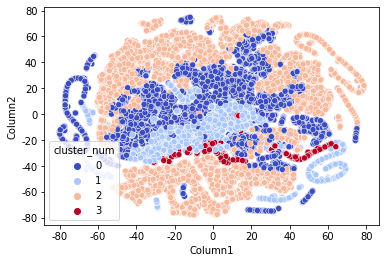

In [ ]:
sns.scatterplot(x='Column1', y='Column2', data=dataset, hue=dataset.cluster_num, palette='coolwarm')

## 클러스터 개수 3개

In [ ]:
SC3 = SpectralClustering(n_clusters = 3, affinity="nearest_neighbors")

In [ ]:
SC3_fit = SC3.fit(clust_data_scaled)

In [ ]:
# 클러스터별 통계량 및 개수
data_scaled.groupby(SC3_fit.labels_).agg(["count", "mean", "std"])

좌석점유율                     유료관객비율  ...      취소비율  시간차평균                    
   count      mean       std  count  ...       std  count      mean       std
0   2210 -0.897119  0.019100   2210  ...  0.036631   2210 -0.544151  0.225486
1   3986 -0.768831  0.087997   3986  ...  0.001130   3986 -0.767799  0.106857
2  34660  0.145620  1.018519  34660  ...  0.929128  34660  0.122995  1.035586

[3 rows x 12 columns]

In [ ]:
data_scaled.groupby(SC3_fit.labels_)["장르명"].value_counts(normalize = True)

   장르명
0  연극     0.677828
   뮤지컬    0.284163
   국악     0.027149
   클래식    0.005882
   복합     0.002715
   무용     0.001810
   오페라    0.000452
1  연극     0.819870
   뮤지컬    0.160813
   클래식    0.011039
   무용     0.003763
   복합     0.002760
   국악     0.001254
   오페라    0.000502
2  연극     0.589267
   뮤지컬    0.352914
   클래식    0.037738
   무용     0.007386
   복합     0.005395
   국악     0.004559
   오페라    0.002741
Name: 장르명, dtype: float64

In [ ]:
silhouette_score(clust_data_scaled, SC3_fit.labels_)

-0.10724082646326993

In [ ]:
range_n_clusters = [2,3,4,5,6]

def ClusterNum(data):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = SpectralClustering(n_clusters=n_clusters, affinity = "nearest_neighbors")
        cluster_labels = clusterer.fit_predict(data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()

For n_clusters = 2 The average silhouette_score is : -0.03640664113707841
For n_clusters = 3 The average silhouette_score is : -0.10684911801614375
For n_clusters = 4 The average silhouette_score is : -0.16149068587095528
For n_clusters = 5 The average silhouette_score is : -0.11705558314615884


KeyboardInterrupt: ignored

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


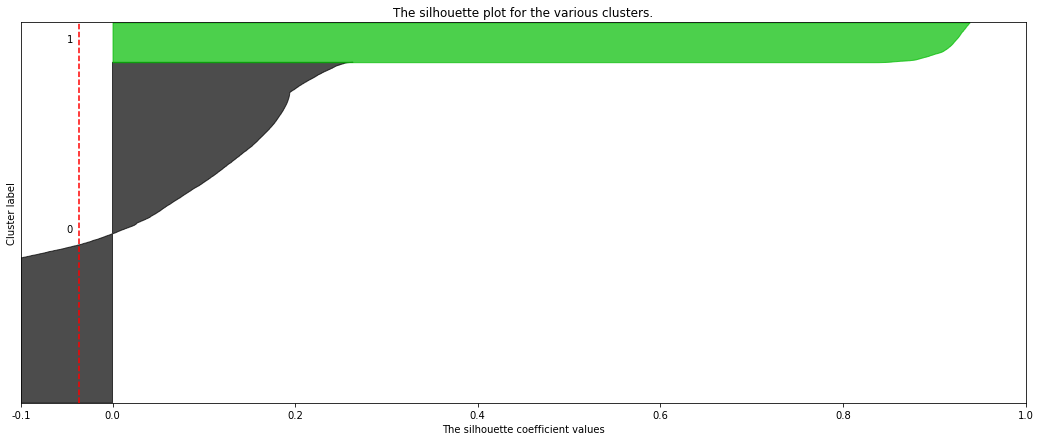

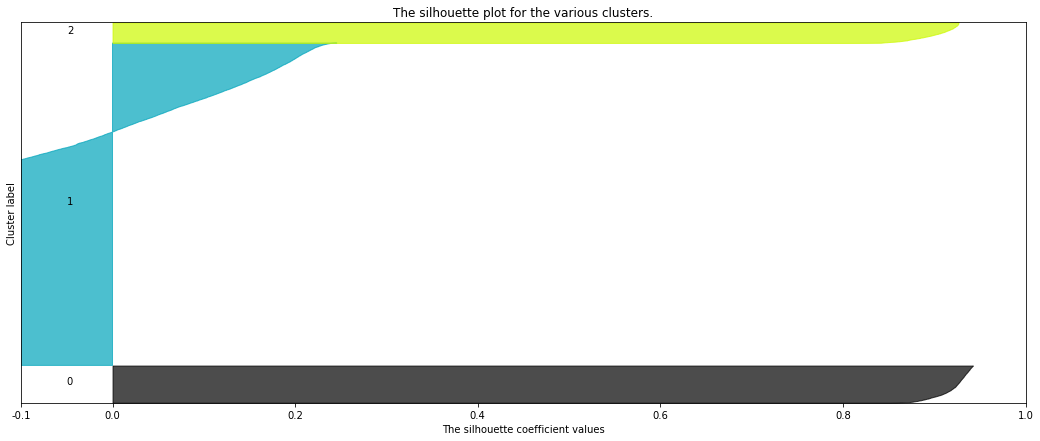

Error in callback <function flush_figures at 0x7fd5400a5050> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
ClusterNum(clust_data_scaled)

For n_clusters = 2 The average silhouette_score is : 0.6545181635216755
For n_clusters = 3 The average silhouette_score is : 0.61955135507518
For n_clusters = 4 The average silhouette_score is : 0.5846017547529252
For n_clusters = 5 The average silhouette_score is : 0.5478289556929874
For n_clusters = 6 The average silhouette_score is : 0.5322825287629676


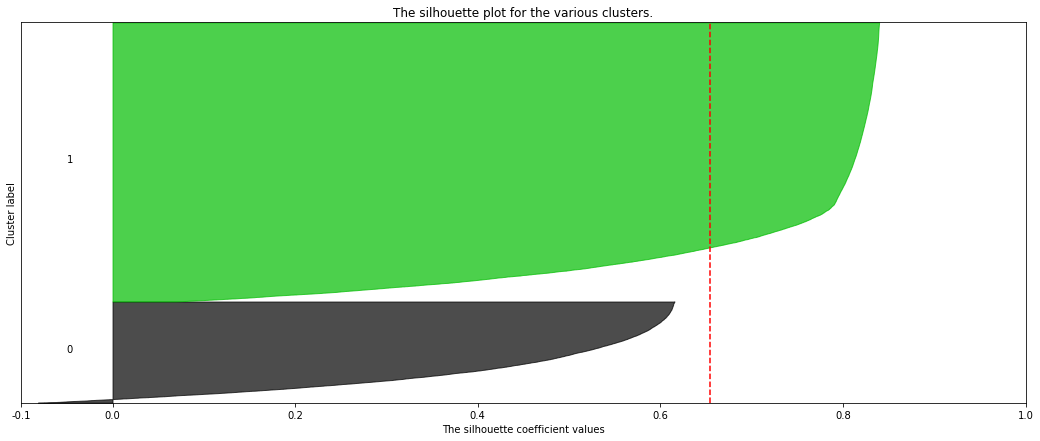

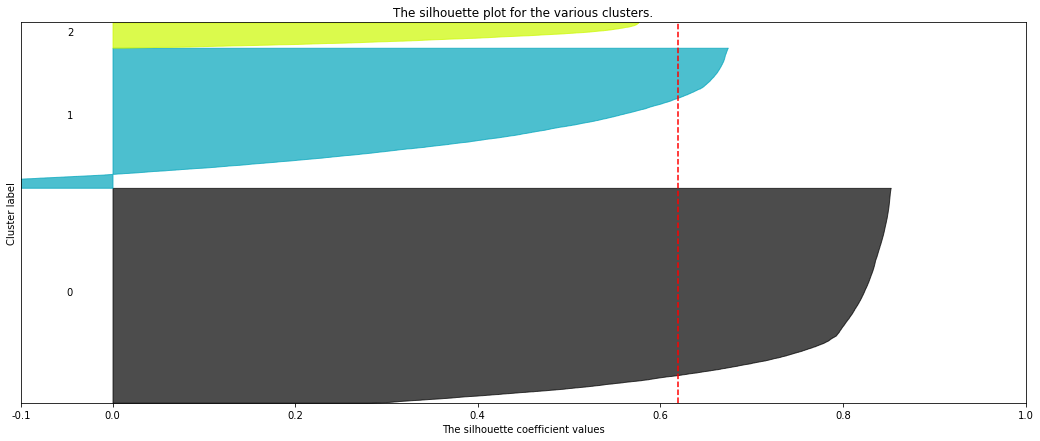

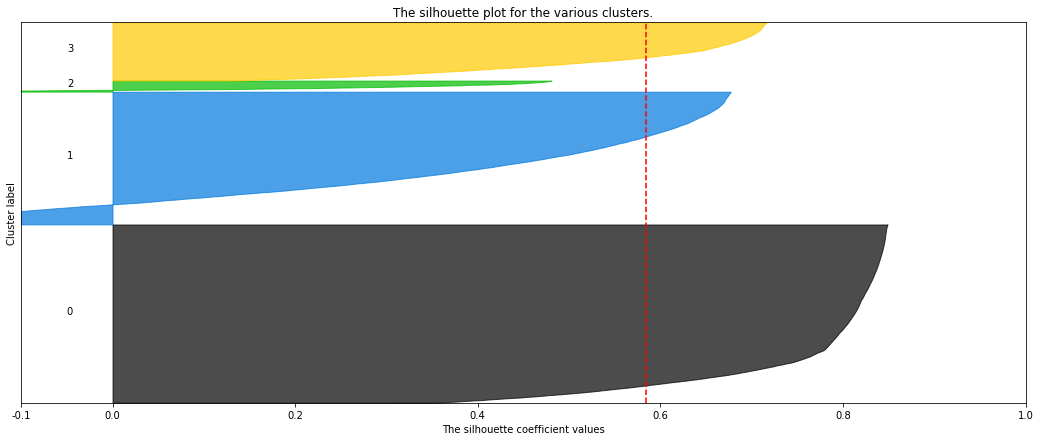

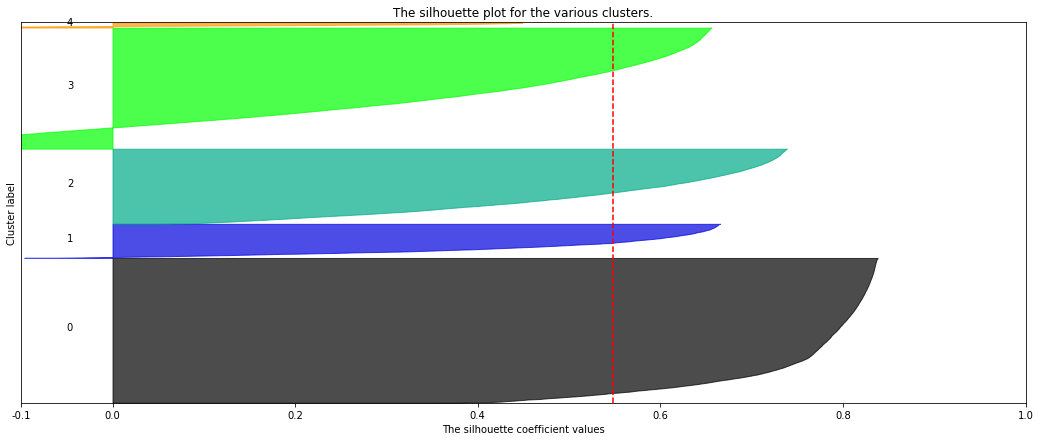

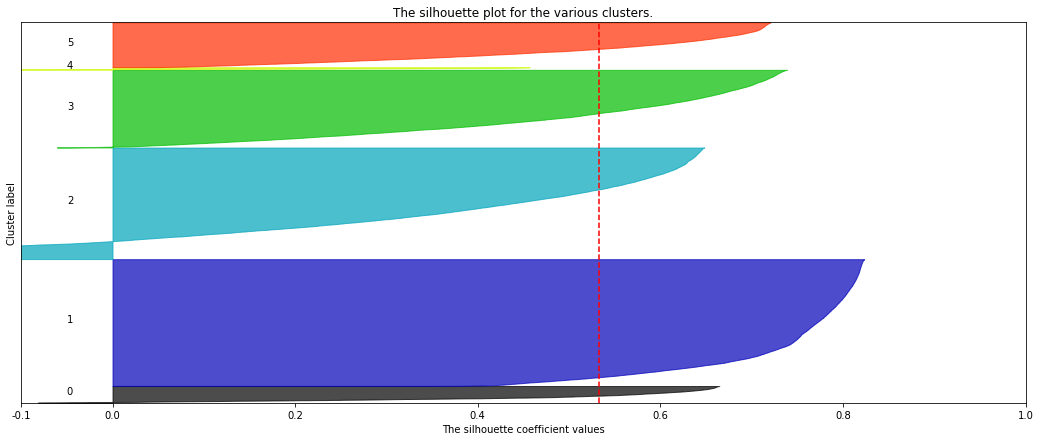

In [ ]:
# 실루엣 값 자체는 낫배드...... 흠
ClusterNum(clust_data)

In [ ]:
SC2 = SpectralClustering(n_clusters = 2, affinity="nearest_neighbors")
SC2_fit = SC2.fit(clust_data)

In [ ]:
clust_data.groupby(SC2_fit.labels_).agg(["count", "mean", "std"])

좌석점유율                     유료관객비율  ...      취소비율  시간차평균                      
   count      mean       std  count  ...       std  count       mean        std
0  10875  0.277686  0.282193  10875  ...  0.340138  10875  24.205725  12.596489
1  29981  0.186448  0.208232  29981  ...  0.338861  29981   5.039118   3.994212

[2 rows x 12 columns]

In [ ]:
data.groupby(SC2_fit.labels_)["장르명"].value_counts(normalize = True)

   장르명
0  뮤지컬    0.543172
   연극     0.391080
   클래식    0.043218
   복합     0.008184
   무용     0.007632
   오페라    0.003494
   국악     0.003218
1  연극     0.698342
   뮤지컬    0.253294
   클래식    0.029852
   무용     0.006404
   국악     0.006271
   복합     0.003836
   오페라    0.002001
Name: 장르명, dtype: float64

In [ ]:
data_scaled.groupby(SC2_fit.labels_)["장르명"].value_counts()

   장르명
0  연극       711
   뮤지컬      277
   클래식        6
   국악         5
   무용         3
   복합         3
   오페라        1
1  연극     24479
   뮤지컬    13224
   클래식     1359
   무용       272
   국악       218
   복합       201
   오페라       97
Name: 장르명, dtype: int64

In [ ]:
tsne = TSNE()
clust_data_transformed = tsne.fit_transform(clust_data)
clust_data_transformed

array([[-15.330595, -42.56424 ],
       [-20.100035, -38.041145],
       [-18.527452, -38.414326],
       ...,
       [-54.79406 ,   5.405061],
       [ 29.154522,  -6.350734],
       [-41.257267, -57.894623]], dtype=float32)

In [ ]:
dataset = pd.DataFrame({'Column1':clust_data_transformed[:,0],'Column2':clust_data_transformed[:,1]})
dataset['cluster_num'] = pd.Series(SC2_fit.labels_)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


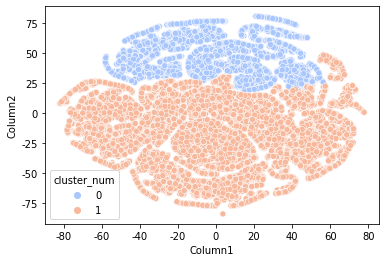

In [ ]:
sns.scatterplot(x='Column1', y='Column2', data=dataset, hue=dataset.cluster_num, palette='coolwarm')

# MinMax 스케일링 호옥시?

In [ ]:
clust_data_mm_scaled = pd.DataFrame(MM.fit_transform(clust_data))
clust_data_mm_scaled.columns = ["좌석점유율", "유료관객비율", "취소비율", "시간차평균"]

In [ ]:
SC2_fit_MMscaled = SC2.fit(clust_data_mm_scaled)

In [ ]:
clust_data.groupby(SC2_fit_MMscaled.labels_).agg(["count", "mean", "std"])

좌석점유율                     유료관객비율  ...      취소비율  시간차평균                      
   count      mean       std  count  ...       std  count       mean        std
0   1006  0.000000  0.000000   1006  ...  0.000000   1006   3.963821   1.221354
1  39850  0.216054  0.234243  39850  ...  0.349185  39850  10.296800  11.306828

[2 rows x 12 columns]

In [ ]:
silhouette_score(clust_data_mm_scaled, labels = SC2_fit_MMscaled.labels_)

0.19092861011613674

For n_clusters = 2 The average silhouette_score is : 0.19092861011613674
For n_clusters = 3 The average silhouette_score is : -0.09081464990266841
For n_clusters = 4 The average silhouette_score is : -0.08294558491171364
For n_clusters = 5 The average silhouette_score is : -0.0792582966838366
For n_clusters = 6 The average silhouette_score is : -0.06995353362740342


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


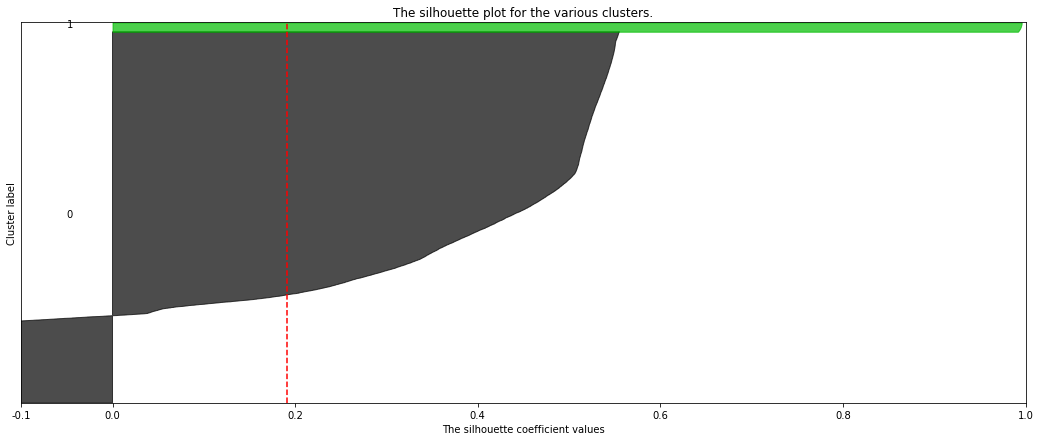

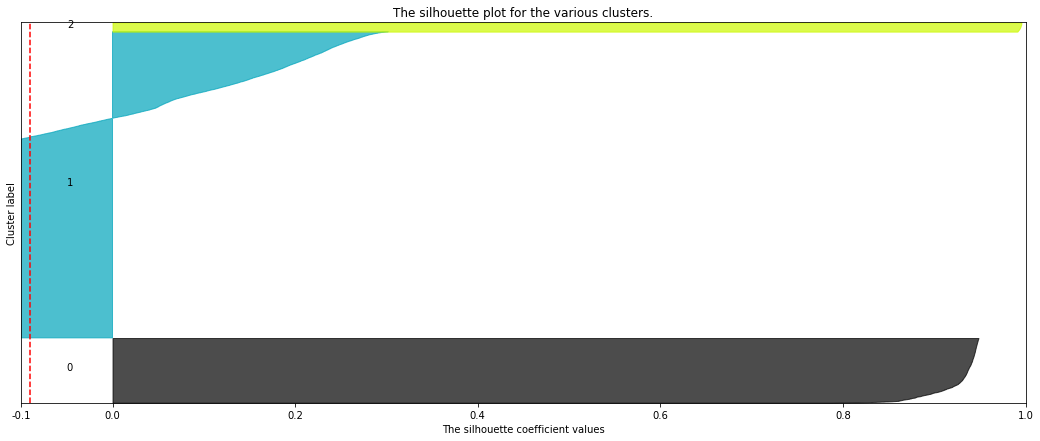

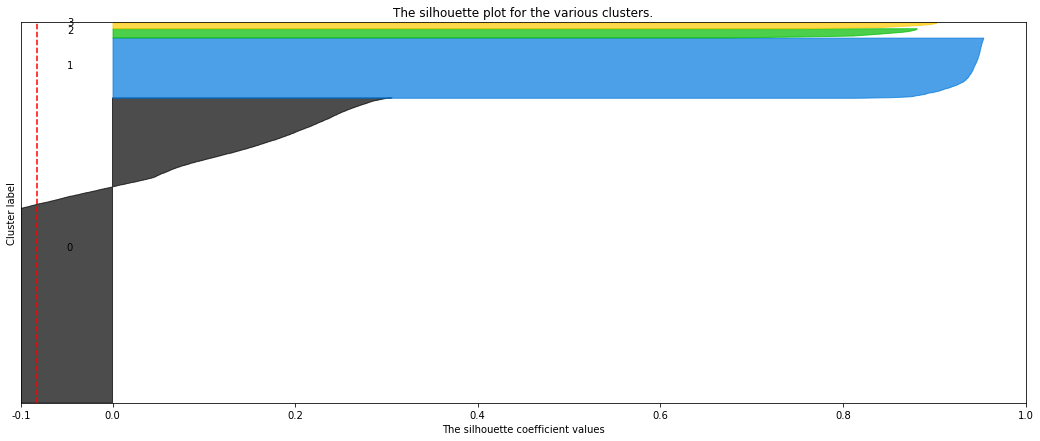

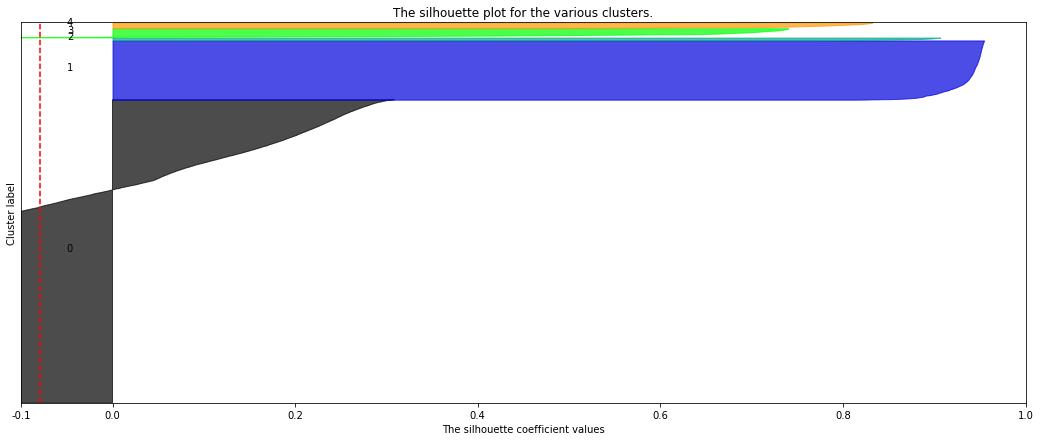

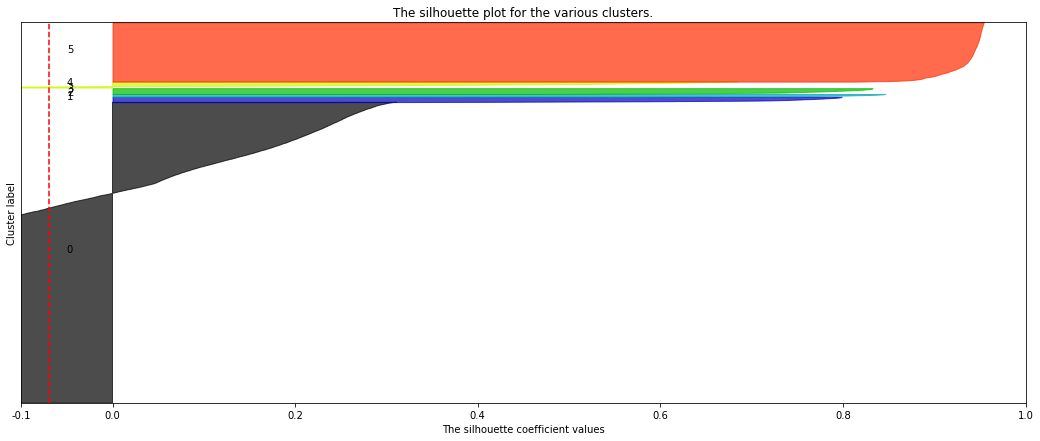

In [ ]:
ClusterNum(clust_data_mm_scaled)

# 피처 하나만 빼보자

In [ ]:
clust_data = data.iloc[:,[3,5,6]]

In [ ]:
clust_data

,좌석점유율,취소비율,시간차평균
0,0.000000,1.000000,0.277965
1,0.006667,0.982301,0.049748
2,0.013333,0.954545,0.106126
3,0.043333,0.814286,1.117410
4,0.013333,0.973510,0.267280
...,...,...,...
40851,0.315000,0.544578,13.453910
40852,0.276667,0.220657,4.971135
40853,0.345000,0.518605,8.429455
40854,0.230000,0.183432,2.873890


In [ ]:
SC2 = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
SC2_fit = SC2.fit(clust_data)

In [ ]:
silhouette_score(clust_data, labels = SC2_fit.labels_)

0.6445165502657448

In [ ]:
silhouette = silhouette_samples(clust_data, labels = SC2_fit.labels_)

In [ ]:
pd.Series(silhouette).groupby(SC2_fit.labels_).mean()

0    0.758119
1    0.394292
dtype: float64

In [ ]:
clust_data

,좌석점유율,취소비율,시간차평균
0,0.000000,1.000000,0.277965
1,0.006667,0.982301,0.049748
2,0.013333,0.954545,0.106126
3,0.043333,0.814286,1.117410
4,0.013333,0.973510,0.267280
...,...,...,...
40851,0.315000,0.544578,13.453910
40852,0.276667,0.220657,4.971135
40853,0.345000,0.518605,8.429455
40854,0.230000,0.183432,2.873890


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_

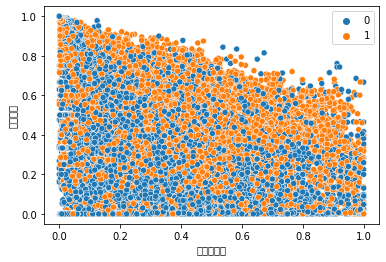

In [ ]:
sns.scatterplot(x=clust_data.좌석점유율, y=clust_data.취소비율, hue = SC2_fit.labels_)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

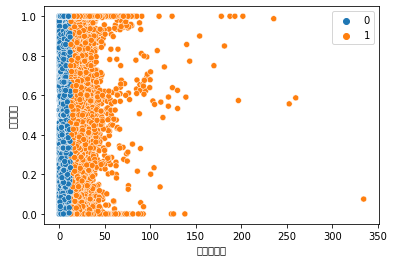

In [ ]:
sns.scatterplot(x=clust_data.시간차평균, y=clust_data.취소비율, hue = SC2_fit.labels_)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

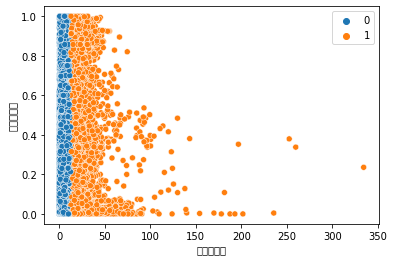

In [ ]:
sns.scatterplot(x=clust_data.시간차평균, y=clust_data.좌석점유율, hue = SC2_fit.labels_)

In [ ]:
data.groupby(["장르명", SC2_fit.labels_]).count()

공연코드   공연일시  좌석점유율  유료관객비율   취소비율  시간차평균
장르명                                             
국악  0    181    181    181     181    181    181
    1     42     42     42      42     42     42
무용  0    186    186    186     186    186    186
    1     89     89     89      89     89     89
뮤지컬 0   6688   6688   6688    6688   6688   6688
    1   6813   6813   6813    6813   6813   6813
복합  0    105    105    105     105    105    105
    1     99     99     99      99     99     99
연극  0  20074  20074  20074   20074  20074  20074
    1   5116   5116   5116    5116   5116   5116
오페라 0     56     56     56      56     56     56
    1     42     42     42      42     42     42
클래식 0    809    809    809     809    809    809
    1    556    556    556     556    556    556

# 20210804~

In [ ]:
# 데이터 로드
genre = pd.read_csv("Dataset/rda files/bygenre.csv")
genre = genre.iloc[:, 1:]
performance = pd.read_csv("Dataset/rda files/by_code.csv", encoding = "cp949")
performance = performance.iloc[:, 1:]

In [ ]:
genre

,장르명,평균좌석점유율,평균취소비율,평균시간차,유료관객비율
0,국악,0.237925,0.437943,8.256344,0.79
1,무용,0.294664,0.192529,12.128034,0.90
2,뮤지컬,0.281285,0.447482,14.143632,0.97
3,복합,0.159422,0.540739,20.329065,0.72
4,연극,0.164163,0.322392,7.579456,0.97
5,오페라,0.318236,0.181488,14.925190,0.97
6,클래식,0.350951,0.187158,15.860246,0.89


In [ ]:
performance

,장르명,공연코드,좌석점유율,유료관객비율,취소비율,시간차평균
0,국악,PF351178,0.023092,1.0,0.935853,3.251107
1,국악,PF371003,0.975000,1.0,0.188872,16.428523
2,국악,PF371055,0.223016,1.0,0.118183,7.610331
3,국악,PF371093,0.792857,1.0,0.034783,4.633127
4,국악,PF371130,0.303571,1.0,0.064064,5.937025
...,...,...,...,...,...,...
2725,클래식,PF392886,0.315000,1.0,0.544578,13.453910
2726,클래식,PF392894,0.276667,1.0,0.220657,4.971135
2727,클래식,PF392949,0.345000,1.0,0.518605,8.429455
2728,클래식,PF392967,0.230000,1.0,0.183432,2.873890


##  장르 7개

In [ ]:
# 클러스터 두개로
model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", n_neighbors=3)

In [ ]:
genre_fit = model.fit(genre.loc[:, "평균좌석점유율":"유료관객비율"])

In [ ]:
genre.groupby(genre_fit.labels_).agg(["count",  "mean", "std"])

평균좌석점유율                     평균취소비율  ...     평균시간차 유료관객비율                
    count      mean       std  count  ...       std  count  mean       std
0       2  0.201044  0.052157      2  ...  0.478632      2  0.88  0.127279
1       5  0.280911  0.072883      5  ...  3.040861      5  0.89  0.102225

[2 rows x 12 columns]

In [ ]:
silhouette_score(genre.loc[:, "평균좌석점유율":"유료관객비율"], labels = genre_fit.labels_)

0.5992233662809211

In [ ]:
# 클러스터 세개로
model = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", n_neighbors=2)

In [ ]:
genre_fit = model.fit(genre.loc[:, "평균좌석점유율":"유료관객비율"])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
genre.groupby(genre_fit.labels_).agg(["count",  "mean", "std"])

평균좌석점유율                     평균취소비율  ...     평균시간차 유료관객비율                    
    count      mean       std  count  ...       std  count      mean       std
0       3  0.298061  0.018708      3  ...  1.443234      3  0.946667  0.040415
1       2  0.201044  0.052157      2  ...  0.478632      2  0.880000  0.127279
2       2  0.255186  0.135432      2  ...  3.159932      2  0.805000  0.120208

[3 rows x 12 columns]

In [ ]:
genre.groupby(["장르명", genre_fit.labels_]).count()

,,평균좌석점유율,평균취소비율,평균시간차,유료관객비율
장르명,,,,,
국악,1,1,1,1,1
무용,0,1,1,1,1
뮤지컬,0,1,1,1,1
복합,2,1,1,1,1
연극,1,1,1,1,1
오페라,0,1,1,1,1
클래식,2,1,1,1,1


In [ ]:
silhouette_score(genre.loc[:, "평균좌석점유율":"유료관객비율"], labels = genre_fit.labels_)

0.435367216055719

# 장르별 따로 따로

In [ ]:
guk = performance[performance['장르명']=="국악"]
musical = performance[performance['장르명']=="뮤지컬"]
moo = performance[performance['장르명']=="무용"]
bok = performance[performance['장르명']=="복합"]
yeon = performance[performance['장르명']=="연극"]
classic = performance[performance['장르명']=="클래식"]
opera = performance[performance['장르명']=="오페라"]

In [ ]:
def summary_SpectralClustering(data, n_components):

    model = SpectralClustering(n_clusters = n_components, affinity = "nearest_neighbors")
    fit = model.fit(data)
    labels = fit.labels_
    silhouette_avg = silhouette_score(data, labels = labels)
    sample_silhouette_values = silhouette_samples(data, labels = labels)

    # 실루엣
    print(f"Average of Silhouette : {silhouette_avg}")

    # 클러스터별 평균치
    print(data.groupby(labels).agg(["count", "mean", "std"]))

    # 클러스터별 실루엣 값 plot

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_components + 1) * 10])   
    
    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()


## 1. 국악

Average of Silhouette : 0.42244321781337957


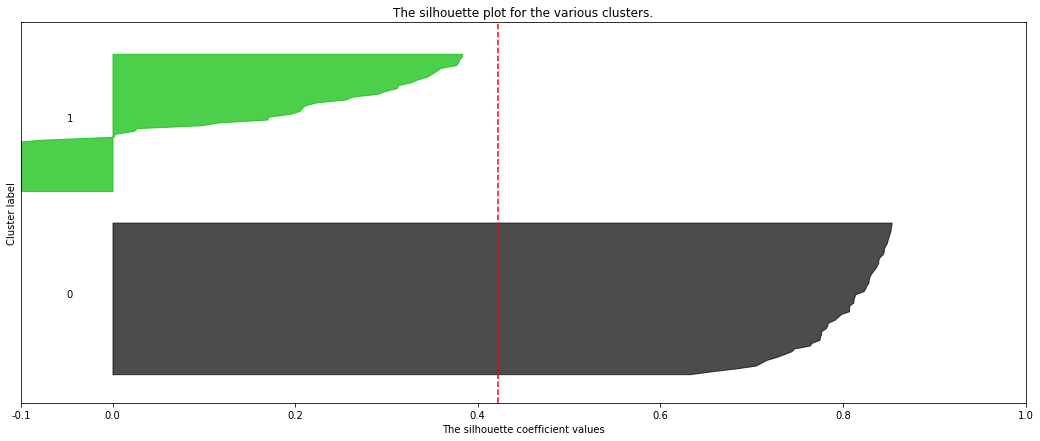

In [ ]:
summary_SpectralClustering(guk.loc[:,"좌석점유율":"시간차평균"], n_components=2)

## 2. 뮤지컬

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average of Silhouette : 0.6061853352077172
  좌석점유율                     유료관객비율  ...      취소비율 시간차평균                      
  count      mean       std  count  ...       std count       mean        std
0   299  0.233475  0.220431    299  ...  0.263075   299  11.217075   5.967818
1    35  0.344090  0.299406     35  ...  0.282500    35  31.712195  10.759384

[2 rows x 12 columns]


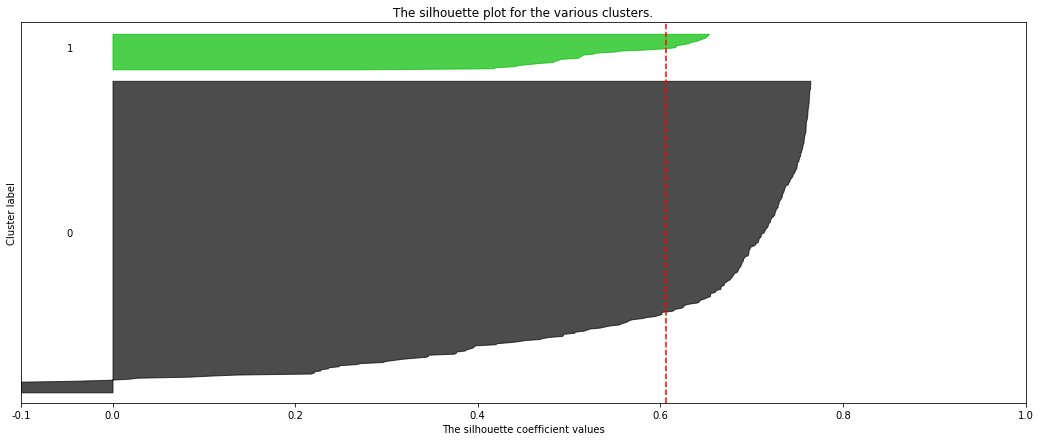

In [ ]:
summary_SpectralClustering(musical.loc[:,"좌석점유율":"시간차평균"], n_components=2)

## 3. 무용

Average of Silhouette : 0.5063868820011261
  좌석점유율                     유료관객비율  ...      취소비율 시간차평균                      
  count      mean       std  count  ...       std count       mean        std
0    54  0.413249  0.265507     54  ...  0.214965    54  18.293902  12.044434
1    76  0.232391  0.213018     76  ...  0.224811    76   4.251299   2.295424

[2 rows x 12 columns]


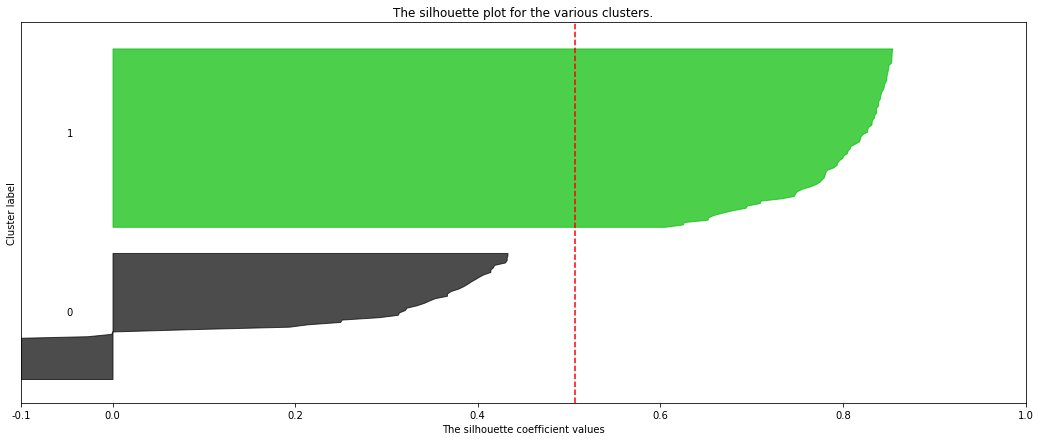

In [ ]:
summary_SpectralClustering(moo.loc[:,"좌석점유율":"시간차평균"], n_components=2)

## 4. 복합

Average of Silhouette : 0.50089132166862
  좌석점유율                     유료관객비율  ...      취소비율 시간차평균                     
  count      mean       std  count  ...       std count       mean       std
0    23  0.243631  0.196993     23  ...  0.307070    23  17.820446  9.934304
1    18  0.178173  0.159523     18  ...  0.243235    18   4.318413  2.048615

[2 rows x 12 columns]


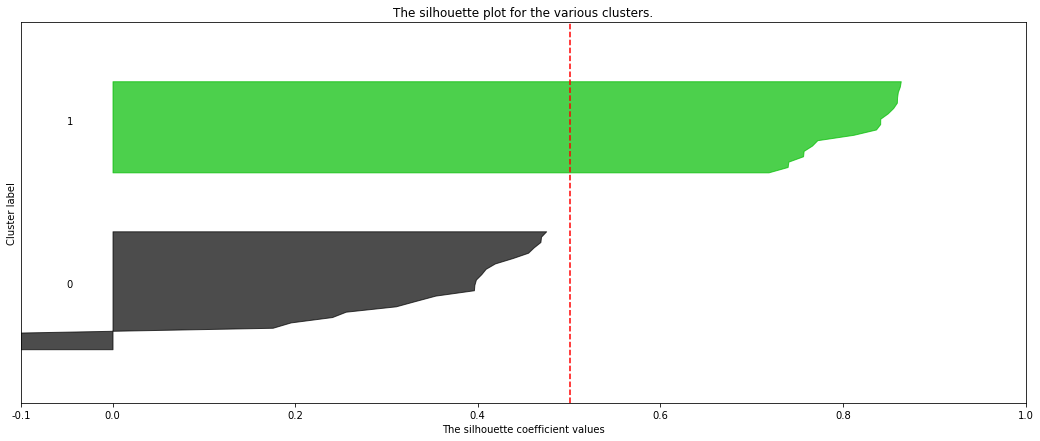

In [ ]:
summary_SpectralClustering(bok.loc[:,"좌석점유율":"시간차평균"], n_components=2)

## 5. 연극

Average of Silhouette : 0.591166961678765
  좌석점유율                     유료관객비율  ...      취소비율 시간차평균                     
  count      mean       std  count  ...       std count       mean       std
0   525  0.116447  0.148678    525  ...  0.182786   525   5.083335  2.174787
1   282  0.215943  0.208672    282  ...  0.225795   282  14.671612  5.713578

[2 rows x 12 columns]


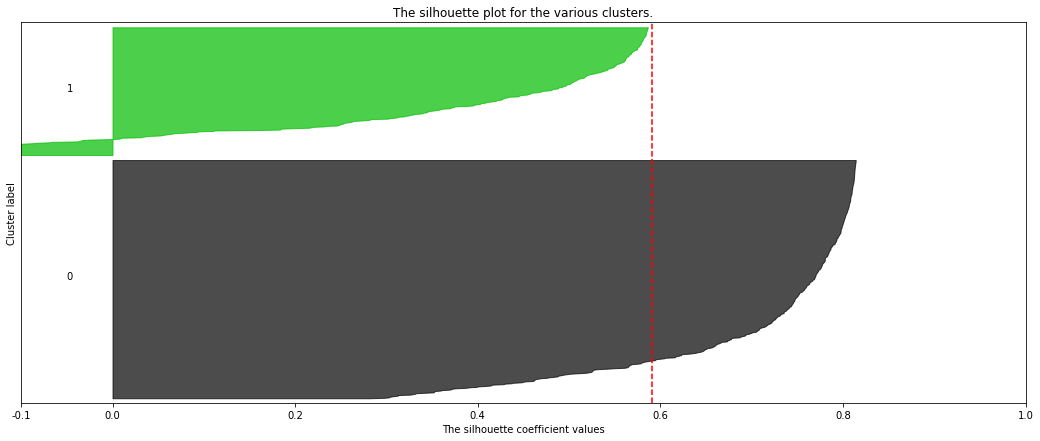

In [ ]:
summary_SpectralClustering(yeon.loc[:,"좌석점유율":"시간차평균"], n_components=2)

## 6. 클래식

Average of Silhouette : 0.5627558104929945
  좌석점유율                     유료관객비율  ...      취소비율 시간차평균                      
  count      mean       std  count  ...       std count       mean        std
0   413  0.377375  0.328249    413  ...  0.260170   413  29.667948  29.160453
1   854  0.359636  0.336571    854  ...  0.217028   854   6.657566   3.859068

[2 rows x 12 columns]


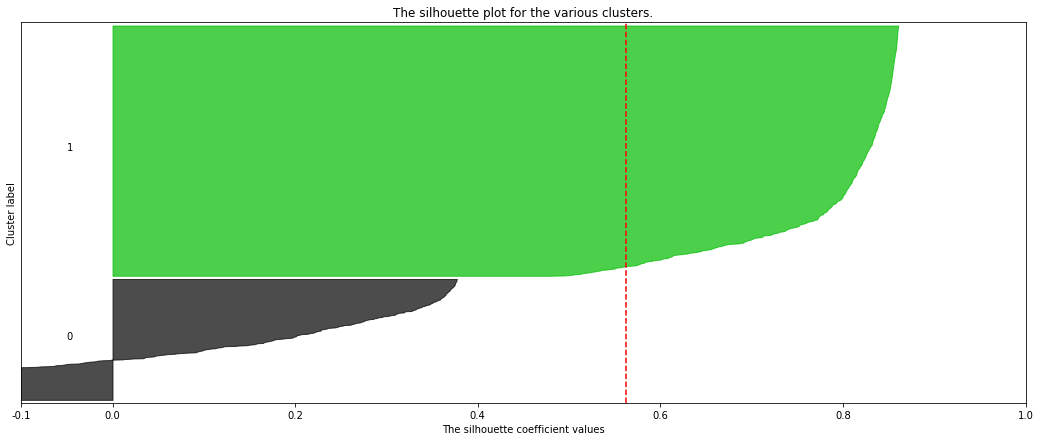

In [ ]:
summary_SpectralClustering(classic.loc[:,"좌석점유율":"시간차평균"], n_components=2)

## 7. 오페라

Average of Silhouette : 0.5327149323760961
  좌석점유율                     유료관객비율  ...      취소비율 시간차평균                      
  count      mean       std  count  ...       std count       mean        std
0    21  0.343764  0.293048     21  ...  0.249191    21  24.196556  11.385178
1    27  0.211072  0.202668     27  ...  0.216526    27   7.952574   3.589362

[2 rows x 12 columns]


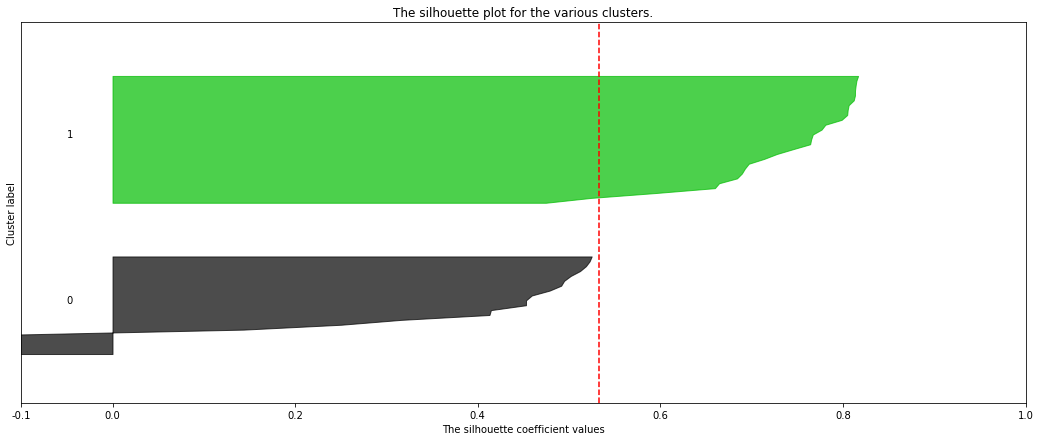

In [ ]:
summary_SpectralClustering(opera.loc[:,"좌석점유율":"시간차평균"], n_components=2)

# 피처 빼보자

In [ ]:
data = pd.read_csv('Dataset/rda files/clustering_genre.csv', encoding = 'cp949')

In [ ]:
data.drop(["공연코드", "공연일시", "시간차평균"], axis =1 , inplace = True)

In [ ]:
clustering = data.drop(["장르명"], axis = 1)

In [ ]:
data.head()

,장르명,좌석점유율,유료관객비율,취소비율
0,국악,0.000000,1.0,1.000000
1,국악,0.006667,1.0,0.982301
2,국악,0.013333,1.0,0.954545
3,국악,0.043333,1.0,0.814286
4,국악,0.013333,1.0,0.973510


In [ ]:
clustering.head()

,좌석점유율,유료관객비율,취소비율
0,0.000000,1.0,1.000000
1,0.006667,1.0,0.982301
2,0.013333,1.0,0.954545
3,0.043333,1.0,0.814286
4,0.013333,1.0,0.973510


In [ ]:
sc = SpectralClustering(n_clusters=6, random_state=619, affinity='nearest_neighbors')

In [ ]:
sc.fit(clustering)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=6,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=619)

In [ ]:
data.groupby(["장르명",sc.labels_]).agg(["count", "mean", "std"]) # Nooooooooooooooooooooooooooooo 처참

좌석점유율                     유료관객비율                       취소비율            \
       count      mean       std  count      mean       std  count      mean   
장르명                                                                            
국악  0    222  0.238921  0.273641    222  0.900811  0.257449    222  0.439915   
    1      1  0.016878       NaN      1  1.000000       NaN      1  0.000000   
무용  0    274  0.295527  0.246577    274  0.766423  0.323568    274  0.193232   
    4      1  0.058201       NaN      1  1.000000       NaN      1  0.000000   
뮤지컬 0  13431  0.282559  0.265171  13431  0.965912  0.134509  13431  0.449814   
    2     20  0.016304  0.003813     20  1.000000  0.000000     20  0.000000   
    3     14  0.037340  0.000354     14  1.000000  0.000000     14  0.000000   
    4     28  0.043577  0.043193     28  1.000000  0.000000     28  0.000000   
    5      8  0.063928  0.000231      8  1.000000  0.000000      8  0.000000   
복합  0    201  0.159654  0.217141    201  0.764328  0.294908    201  0.548810   
    4      3  0.143861  0.074237      3  1.000000  0.000000      3  0.000000   
연극  0  24530  0.167305  0.194277  24530  0.981580  0.111191  24530  0.331066   
    1     59  0.016807  0.000000     59  1.000000  0.000000     59  0.000000   
    2     78  0.026000  0.008215     78  1.000000  0.000000     78  0.000000   
    3    129  0.037337  0.000452    129  1.000000  0.000000    129  0.000000   
    4    159  0.053732  0.054174    159  1.000000  0.000000    159  0.000000   
    5    235  0.063408  0.000189    235  1.000000  0.000000    235  0.000000   
오페라 0     98  0.318236  0.208131     98  0.960306  0.130388     98  0.181488   
클래식 0   1356  0.353029  0.330234   1356  0.907205  0.261084   1356  0.188401   
    3      2  0.037037  0.000000      2  1.000000  0.000000      2  0.000000   
    4      6  0.033797  0.018904      6  1.000000  0.000000      6  0.000000   
    5      1  0.063492       NaN      1  1.000000       NaN      1  0.000000   

                 
            std  
장르명              
국악  0  0.420700  
    1       NaN  
무용  0  0.270561  
    4       NaN  
뮤지컬 0  0.335511  
    2  0.000000  
    3  0.000000  
    4  0.000000  
    5  0.000000  
복합  0  0.399447  
    4  0.000000  
연극  0  0.366643  
    1  0.000000  
    2  0.000000  
    3  0.000000  
    4  0.000000  
    5  0.000000  
오페라 0  0.209631  
클래식 0  0.261465  
    3  0.000000  
    4  0.000000  
    5       NaN

In [ ]:
sc = SpectralClustering(n_clusters=2, random_state=619, affinity='nearest_neighbors')
sc.fit(clustering)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: ignored

In [ ]:
data.groupby(["장르명",sc.labels_]).agg(["count", "mean", "std"])

AttributeError: ignored

In [ ]:
performance = data

In [ ]:
guk = performance[performance['장르명']=="국악"]
musical = performance[performance['장르명']=="뮤지컬"]
moo = performance[performance['장르명']=="무용"]
bok = performance[performance['장르명']=="복합"]
yeon = performance[performance['장르명']=="연극"]
classic = performance[performance['장르명']=="클래식"]
opera = performance[performance['장르명']=="오페라"]

In [ ]:
def summary_SpectralClustering(data, n_components):

    model = SpectralClustering(n_clusters = n_components, affinity = "nearest_neighbors")
    fit = model.fit(data)
    labels = fit.labels_
    silhouette_avg = silhouette_score(data, labels = labels)
    sample_silhouette_values = silhouette_samples(data, labels = labels)

    # 실루엣
    print(f"Average of Silhouette : {silhouette_avg}")

    # 클러스터별 평균치
    print(data.groupby(labels).agg(["count", "mean", "std"]))

    # 클러스터별 실루엣 값 plot

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_components + 1) * 10])   
    
    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Average of Silhouette : 0.6362953471476515
  좌석점유율                     유료관객비율                      취소비율            \
  count      mean       std  count      mean       std count      mean   
0   144  0.364864  0.264940    144  0.852639  0.305797   144  0.142412   
1    79  0.006543  0.011365     79  0.989873  0.064520    79  0.976631   

             
        std  
0  0.159234  
1  0.048027  


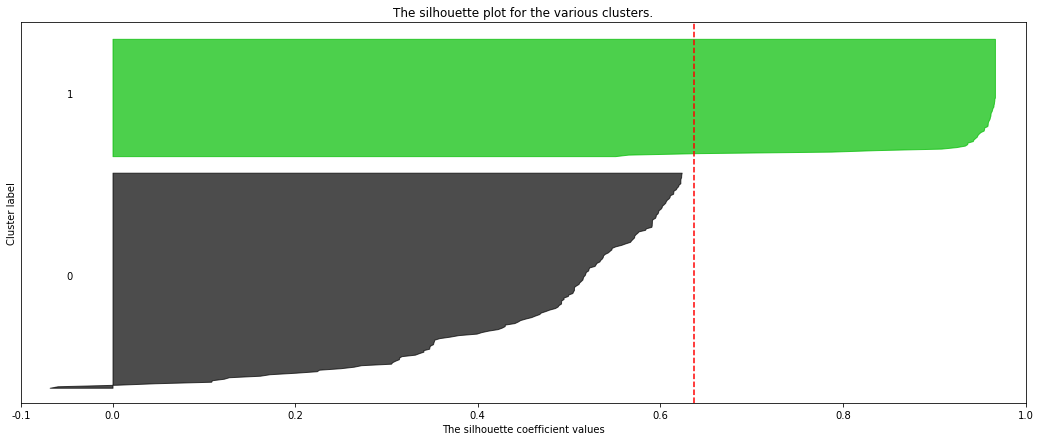

In [ ]:
summary_SpectralClustering(guk.loc[:,"좌석점유율":"취소비율"], n_components=2)

## 2. 뮤지컬

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average of Silhouette : 0.02322391658612213
   좌석점유율                     유료관객비율                       취소비율            \
   count      mean       std  count      mean       std  count      mean   
0  13370  0.283888  0.265061  13370  0.965757  0.134796  13370  0.451867   
1    131  0.015627  0.006334    131  1.000000  0.000000    131  0.000000   

             
        std  
0  0.334894  
1  0.000000  


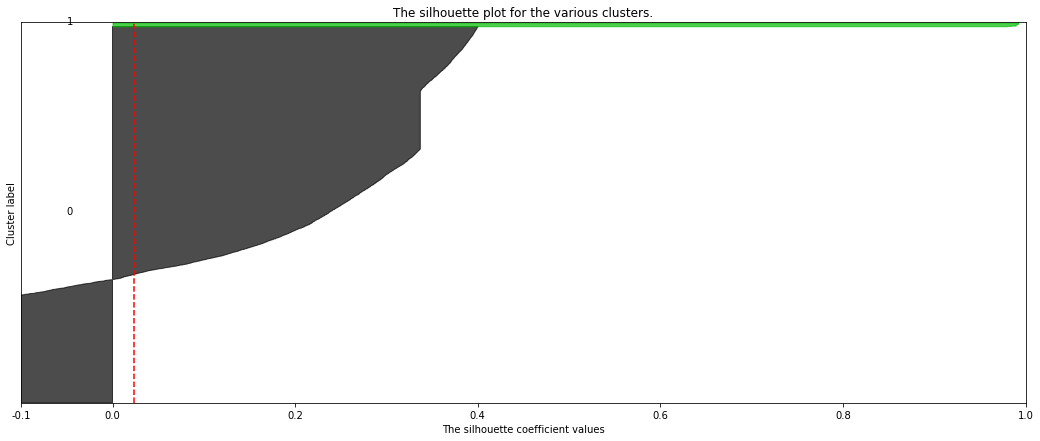

In [ ]:
summary_SpectralClustering(musical.loc[:,"좌석점유율":"취소비율"], n_components=2)

## 3. 무용

Average of Silhouette : 0.3203876068289804
  좌석점유율                     유료관객비율                      취소비율            \
  count      mean       std  count      mean       std count      mean   
0   154  0.435630  0.223233    154  0.943182  0.103259   154  0.209661   
1   121  0.115251  0.131502    121  0.543388  0.367137   121  0.170725   

             
        std  
0  0.173261  
1  0.357375  


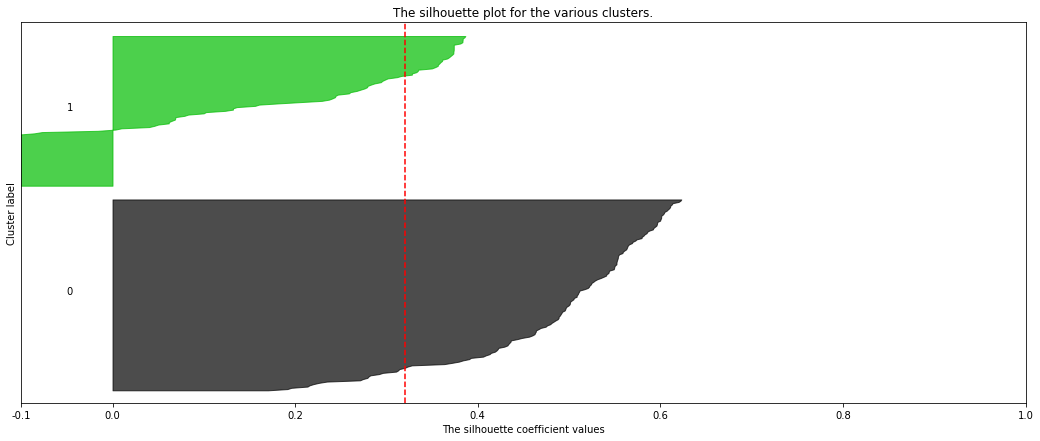

In [ ]:
summary_SpectralClustering(moo.loc[:,"좌석점유율":"취소비율"], n_components=2)

## 4. 복합

Average of Silhouette : 0.5018609876997121
  좌석점유율                     유료관객비율                      취소비율            \
  count      mean       std  count      mean       std count      mean   
0   125  0.258196  0.224951    125  0.771840  0.340627   125  0.254028   
1    79  0.003133  0.015117     79  0.761392  0.201461    79  0.994397   

             
        std  
0  0.224244  
1  0.020367  


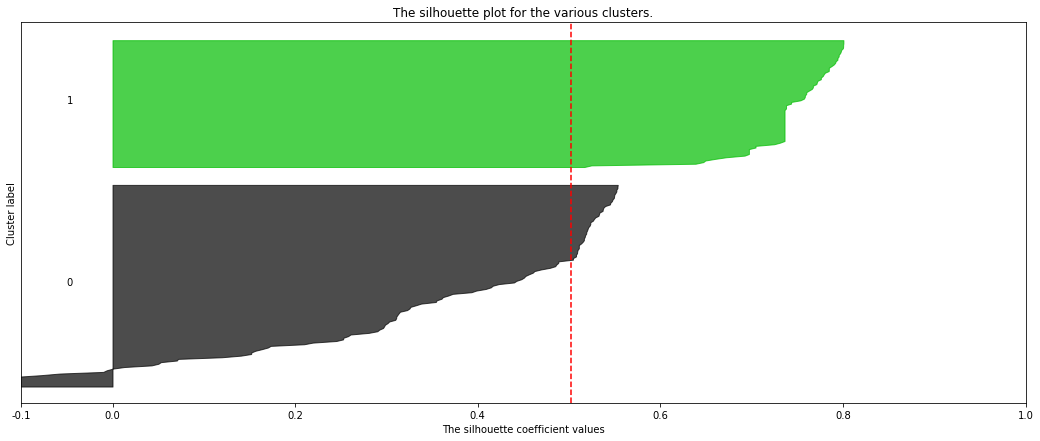

In [ ]:
summary_SpectralClustering(bok.loc[:,"좌석점유율":"취소비율"], n_components=2)

## 5. 연극

In [ ]:
summary_SpectralClustering(yeon.loc[:,"좌석점유율":"취소비율"], n_components=2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


## 6. 클래식

In [ ]:
summary_SpectralClustering(classic.loc[:,"좌석점유율":"취소비율"], n_components=2)

## 7. 오페라

In [ ]:
summary_SpectralClustering(opera.loc[:,"좌석점유율":"취소비율"], n_components=2)